### Data Preprocessing

In [36]:
import pandas as pd
import numpy as np
import os, re
import matplotlib.pyplot as plt
import nltk
import math
%matplotlib inline

In [37]:
os.chdir(r'E:\Hackathon\Beer_dataset_Machine_hack')

In [5]:
train_data=pd.read_csv('Beer Train Data Set.csv')
test_data=pd.read_csv('Beer Test Data Set.csv')
train_data.shape, test_data.shape

((185643, 10), (20628, 10))

In [6]:
train_data.head()

,ABV,Brewing Company,Food Paring,Glassware Used,Beer Name,Ratings,Style Name,Cellar Temperature,Serving Temperature,Score
0,6.5,8929,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",15121,22,AmericanIPA,40-45,45-50,3.28
1,5.5,13187,"(PanAsian)Cheese(earthyCamembert,Fontina,nutty...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",59817,1,AmericanPaleAle(APA),35-40,40-45,3.52
2,8.1,6834,"Meat(Pork,Poultry)","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",32669,3,IrishRedAle,35-40,40-45,4.01
3,NaN,11688,"(Indian,LatinAmerican,PanAsian)General(Aperitif)","PintGlass(orBecker,Nonic,Tumbler),PilsenerGlas...",130798,0,AmericanMaltLiquor,35-40,35-40,0.00
4,6.0,10417,"Meat(Poultry,Fish,Shellfish)",PilsenerGlass(orPokal),124087,1,EuroPaleLager,35-40,40-45,2.73


In [7]:
test_data.head()

,ABV,Brewing Company,Food Paring,Glassware Used,Beer Name,Ratings,Style Name,Cellar Temperature,Serving Temperature,Score
0,6.2,8803,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",34558,3,AmericanIPA,40-45,45-50,NaN
1,5.3,8558,"(Barbecue)Cheese(butteryBrie,Gouda,Havarti,Swi...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",86826,20,AmericanPorter,40-45,45-50,NaN
2,7.0,7519,"Cheese(earthyCamembert,Fontina)General(Aperitif)","Snifter,Tulip,OversizedWineGlass",17051,0,BelgianDarkAle,45-50,45-50,NaN
3,5.2,9852,"(LatinAmerican,German)Meat(Pork,Poultry)","Flute,PilsenerGlass(orPokal),Mug(orSeidel,Stein)",49156,2,ViennaLager,35-40,40-45,NaN
4,8.1,8991,"(Barbecue)Cheese(butteryBrie,Gouda,Havarti,Swi...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",162723,5,AmericanPorter,40-45,45-50,NaN


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185643 entries, 0 to 185642
Data columns (total 10 columns):
ABV                    170513 non-null float64
Brewing Company        185643 non-null int64
Food Paring            185643 non-null object
Glassware Used         185643 non-null object
Beer Name              185643 non-null int64
Ratings                185643 non-null object
Style Name             185643 non-null object
Cellar Temperature     178862 non-null object
Serving Temperature    185450 non-null object
Score                  185643 non-null float64
dtypes: float64(2), int64(2), object(6)
memory usage: 14.2+ MB


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20628 entries, 0 to 20627
Data columns (total 10 columns):
ABV                    18964 non-null float64
Brewing Company        20628 non-null int64
Food Paring            20628 non-null object
Glassware Used         20628 non-null object
Beer Name              20628 non-null int64
Ratings                20628 non-null object
Style Name             20628 non-null object
Cellar Temperature     19873 non-null object
Serving Temperature    20607 non-null object
Score                  0 non-null float64
dtypes: float64(2), int64(2), object(6)
memory usage: 1.6+ MB


### Imputing Missing values

In [10]:
# Impute missing values with mean of ABV in train and test sets
train_data['ABV'].fillna(train_data['ABV'].mean(), inplace=True)
test_data['ABV'].fillna(test_data['ABV'].mean(), inplace=True)

In [11]:
# Impute missing categorical variable with unknown category
train_data['Serving Temperature'].fillna('0-0', inplace=True)
test_data['Serving Temperature'].fillna('0-0', inplace=True)

In [12]:
# Impute missing categorical variable with unknown category
train_data['Cellar Temperature'].fillna('0-0', inplace=True)
test_data['Cellar Temperature'].fillna('0-0', inplace=True)

In [13]:
# need to impute values for cellar temperature
def min_max_sep(df, col_name):
    min_temp=[]
    max_temp=[]
    for i in range(len(df[col_name])):
        ax=df[col_name][i].split('-')[0]
        min_temp.append(ax)
        ac=df[col_name][i].split('-')[1]
        max_temp.append(ac)
    clean_min_temp=[int(i) for i in min_temp]
    clean_max_temp=[int(i) for i in max_temp]
    for xc in range(len(clean_min_temp)):
        if clean_min_temp[xc]==0:
            clean_min_temp[xc]=int(round(np.mean(clean_min_temp),0))
    for xd in range(len(clean_max_temp)):
        if clean_max_temp[xd]==0:
            clean_max_temp[xd]=int(round(np.mean(clean_max_temp),0))
    min_col_mod='min_'+''.join(col_name.lower().split())
    max_col_mod='max_'+''.join(col_name.lower().split())
    df[min_col_mod]=clean_min_temp
    df[max_col_mod]=clean_max_temp
    return df

In [14]:
# Getting max and min cellar and serving temperature in train set
train_data_1=min_max_sep(df=train_data, col_name='Cellar Temperature')
train_data_1=min_max_sep(df=train_data_1, col_name='Serving Temperature')

In [15]:
# Getting max and min cellar and serving temperature in test set
test_data_1=min_max_sep(df=test_data, col_name='Cellar Temperature')
test_data_1=min_max_sep(df=test_data_1, col_name='Serving Temperature')

In [16]:
train_data_1.shape

(185643, 14)

In [17]:
test_data_1.head()

,ABV,Brewing Company,Food Paring,Glassware Used,Beer Name,Ratings,Style Name,Cellar Temperature,Serving Temperature,Score,min_cellartemperature,max_cellartemperature,min_servingtemperature,max_servingtemperature
0,6.2,8803,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",34558,3,AmericanIPA,40-45,45-50,NaN,40,45,45,50
1,5.3,8558,"(Barbecue)Cheese(butteryBrie,Gouda,Havarti,Swi...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",86826,20,AmericanPorter,40-45,45-50,NaN,40,45,45,50
2,7.0,7519,"Cheese(earthyCamembert,Fontina)General(Aperitif)","Snifter,Tulip,OversizedWineGlass",17051,0,BelgianDarkAle,45-50,45-50,NaN,45,50,45,50
3,5.2,9852,"(LatinAmerican,German)Meat(Pork,Poultry)","Flute,PilsenerGlass(orPokal),Mug(orSeidel,Stein)",49156,2,ViennaLager,35-40,40-45,NaN,35,40,40,45
4,8.1,8991,"(Barbecue)Cheese(butteryBrie,Gouda,Havarti,Swi...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",162723,5,AmericanPorter,40-45,45-50,NaN,40,45,45,50


### Getting Food Parings and Glassware used

In [18]:
def food_parings_sep(df, col_name):
    temp_df=pd.DataFrame(np.nan, index=range(len(df)), columns=['Cheese','General','Meat'])
    temp_df=temp_df.fillna(0, inplace=False)
    for xd in range(len(df[col_name])):
        split_words=re.findall(r'[^(.*?)]+', df[col_name][xd])
        for word in split_words:
            if word=='Cheese':
                temp_df['Cheese'].iloc[xd]=1
            elif word=='General':
                temp_df['General'].iloc[xd]=1
            elif word=='Meat':
                temp_df['Meat'].iloc[xd]=1
    cusines_known=[]
    cusine_flag=[]
    for j in df[col_name]:
        x=j.split('(')[0]
        if x=='':
            cus=j.split('(')[1]
            cusines_known.append(cus.split(')')[0])
            cusine_flag.append(1)
        else:
            cusines_known.append('cusine_unknown')
            cusine_flag.append(0)
    temp_df['cusine_type']=cusines_known
    temp_df['cusine_flag']=cusine_flag
    main_df=df.join(temp_df)
    
    return main_df

In [19]:
train_data_2=food_parings_sep(df=train_data_1, col_name='Food Paring')
test_data_2=food_parings_sep(df=test_data_1, col_name='Food Paring')

In [20]:
train_data_2.head()

,ABV,Brewing Company,Food Paring,Glassware Used,Beer Name,Ratings,Style Name,Cellar Temperature,Serving Temperature,Score,min_cellartemperature,max_cellartemperature,min_servingtemperature,max_servingtemperature,Cheese,General,Meat,cusine_type,cusine_flag
0,6.500000,8929,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",15121,22,AmericanIPA,40-45,45-50,3.28,40,45,45,50,1.0,0.0,1.0,"Curried,Thai",1
1,5.500000,13187,"(PanAsian)Cheese(earthyCamembert,Fontina,nutty...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",59817,1,AmericanPaleAle(APA),35-40,40-45,3.52,35,40,40,45,1.0,1.0,1.0,PanAsian,1
2,8.100000,6834,"Meat(Pork,Poultry)","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",32669,3,IrishRedAle,35-40,40-45,4.01,35,40,40,45,0.0,0.0,1.0,cusine_unknown,0
3,6.354961,11688,"(Indian,LatinAmerican,PanAsian)General(Aperitif)","PintGlass(orBecker,Nonic,Tumbler),PilsenerGlas...",130798,0,AmericanMaltLiquor,35-40,35-40,0.00,35,40,35,40,0.0,1.0,0.0,"Indian,LatinAmerican,PanAsian",1
4,6.000000,10417,"Meat(Poultry,Fish,Shellfish)",PilsenerGlass(orPokal),124087,1,EuroPaleLager,35-40,40-45,2.73,35,40,40,45,0.0,0.0,1.0,cusine_unknown,0


In [21]:
test_data_2.head()

,ABV,Brewing Company,Food Paring,Glassware Used,Beer Name,Ratings,Style Name,Cellar Temperature,Serving Temperature,Score,min_cellartemperature,max_cellartemperature,min_servingtemperature,max_servingtemperature,Cheese,General,Meat,cusine_type,cusine_flag
0,6.2,8803,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",34558,3,AmericanIPA,40-45,45-50,NaN,40,45,45,50,1.0,0.0,1.0,"Curried,Thai",1
1,5.3,8558,"(Barbecue)Cheese(butteryBrie,Gouda,Havarti,Swi...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",86826,20,AmericanPorter,40-45,45-50,NaN,40,45,45,50,1.0,1.0,1.0,Barbecue,1
2,7.0,7519,"Cheese(earthyCamembert,Fontina)General(Aperitif)","Snifter,Tulip,OversizedWineGlass",17051,0,BelgianDarkAle,45-50,45-50,NaN,45,50,45,50,1.0,1.0,0.0,cusine_unknown,0
3,5.2,9852,"(LatinAmerican,German)Meat(Pork,Poultry)","Flute,PilsenerGlass(orPokal),Mug(orSeidel,Stein)",49156,2,ViennaLager,35-40,40-45,NaN,35,40,40,45,0.0,0.0,1.0,"LatinAmerican,German",1
4,8.1,8991,"(Barbecue)Cheese(butteryBrie,Gouda,Havarti,Swi...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",162723,5,AmericanPorter,40-45,45-50,NaN,40,45,45,50,1.0,1.0,1.0,Barbecue,1


In [22]:
def glassware_sep(df, col_name):  
    glass_df=pd.DataFrame(np.nan, index=range(len(df)), columns=['flute','pilsenerglass','snifter','oversizedwineglass',\
                                                                         'tulip','stange','weizenglass','goblet','mug',\
                                                                         'pintglass'])
    glass_df=glass_df.fillna(0, inplace=False)
    for xd in range(len(df[col_name])):
        split_words=re.findall(r'[^(.*?,)]+', df[col_name][xd])
        for word in split_words:
            if word=='Flute':
                glass_df['flute'].iloc[xd]=1
            elif word=='PilsenerGlass':
                glass_df['pilsenerglass'].iloc[xd]=1
            elif word=='Snifter':
                glass_df['snifter'].iloc[xd]=1
            elif word=='OversizedWineGlass':
                glass_df['oversizedwineglass'].iloc[xd]=1
            elif word=='Tulip':
                glass_df['tulip'].iloc[xd]=1
            elif word=='Stange':
                glass_df['stange'].iloc[xd]=1
            elif word=='WeizenGlass':
                glass_df['weizenglass'].iloc[xd]=1
            elif word=='Goblet':
                glass_df['goblet'].iloc[xd]=1
            elif word=='Mug':
                glass_df['mug'].iloc[xd]=1
            elif word=='PintGlass':
                glass_df['pintglass'].iloc[xd]=1
    main_df=df.join(glass_df)
    
    return main_df

In [23]:
train_data_3=glassware_sep(df=train_data_2, col_name='Glassware Used')
test_data_3=glassware_sep(df=test_data_2, col_name='Glassware Used')

In [24]:
train_data_3.head()

,ABV,Brewing Company,Food Paring,Glassware Used,Beer Name,Ratings,Style Name,Cellar Temperature,Serving Temperature,Score,...,flute,pilsenerglass,snifter,oversizedwineglass,tulip,stange,weizenglass,goblet,mug,pintglass
0,6.500000,8929,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",15121,22,AmericanIPA,40-45,45-50,3.28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,5.500000,13187,"(PanAsian)Cheese(earthyCamembert,Fontina,nutty...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",59817,1,AmericanPaleAle(APA),35-40,40-45,3.52,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,8.100000,6834,"Meat(Pork,Poultry)","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",32669,3,IrishRedAle,35-40,40-45,4.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,6.354961,11688,"(Indian,LatinAmerican,PanAsian)General(Aperitif)","PintGlass(orBecker,Nonic,Tumbler),PilsenerGlas...",130798,0,AmericanMaltLiquor,35-40,35-40,0.00,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,6.000000,10417,"Meat(Poultry,Fish,Shellfish)",PilsenerGlass(orPokal),124087,1,EuroPaleLager,35-40,40-45,2.73,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
test_data_3.head()

,ABV,Brewing Company,Food Paring,Glassware Used,Beer Name,Ratings,Style Name,Cellar Temperature,Serving Temperature,Score,...,flute,pilsenerglass,snifter,oversizedwineglass,tulip,stange,weizenglass,goblet,mug,pintglass
0,6.2,8803,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",34558,3,AmericanIPA,40-45,45-50,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,5.3,8558,"(Barbecue)Cheese(butteryBrie,Gouda,Havarti,Swi...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",86826,20,AmericanPorter,40-45,45-50,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,7.0,7519,"Cheese(earthyCamembert,Fontina)General(Aperitif)","Snifter,Tulip,OversizedWineGlass",17051,0,BelgianDarkAle,45-50,45-50,NaN,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,5.2,9852,"(LatinAmerican,German)Meat(Pork,Poultry)","Flute,PilsenerGlass(orPokal),Mug(orSeidel,Stein)",49156,2,ViennaLager,35-40,40-45,NaN,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,8.1,8991,"(Barbecue)Cheese(butteryBrie,Gouda,Havarti,Swi...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",162723,5,AmericanPorter,40-45,45-50,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [26]:
# Remove comma's from the ratings column to train the model
train_data_3['Ratings']=train_data_3['Ratings'].str.replace(',','').astype(int)
test_data_3['Ratings']=test_data_3['Ratings'].str.replace(',','').astype(int)

In [27]:
# Mostly Grouped based on secondary research (Google search- Wikipedia Source)
def beer_type_cateorizer(data_frame):
    beer_type_cat=[]
    for xd in range(len(data_frame['Style Name'])):
        split_by_cap=re.findall('[A-Z][^A-Z-(]*', data_frame['Style Name'][xd])
        if split_by_cap[-1]=='A':
            beer_type_cat.append('Ales')
        elif 'Ale' in split_by_cap:
            beer_type_cat.append('Ales')
        elif 'Malt' in split_by_cap:
            beer_type_cat.append('Malts')
        elif 'Lager' in split_by_cap:
            beer_type_cat.append('Lagers')
        elif 'Stout' in split_by_cap:
            beer_type_cat.append('Stouts_and_Porters')
        elif 'Porter' in split_by_cap:
            beer_type_cat.append('Stouts_and_Porters')
        elif 'Tan' in split_by_cap:
            beer_type_cat.append('Stouts_and_Porters')
        elif 'Bitter' in split_by_cap:
            beer_type_cat.append('Ales')
        elif 'Bock' in split_by_cap:
            beer_type_cat.append('Lagers')
        elif 'Eisbock' in split_by_cap:
            beer_type_cat.append('Lagers')
        elif 'Weizenbock' in split_by_cap:
            beer_type_cat.append('Lagers')
        elif 'Kvass' in split_by_cap:
            beer_type_cat.append('Lagers')
        elif 'Roggenbier' in split_by_cap:
            beer_type_cat.append('Lagers')
        elif 'Schwarzbier' in split_by_cap:
            beer_type_cat.append('Lagers')
        elif 'Garde' in split_by_cap:
            beer_type_cat.append('Lagers')
        elif 'Pilsener' in split_by_cap:
            beer_type_cat.append('Lagers')
        elif 'Mrzen' in split_by_cap:
            beer_type_cat.append('Lagers')
        elif 'Doppelbock' in split_by_cap:
            beer_type_cat.append('Lagers')
        elif 'Smoked' in split_by_cap:
            beer_type_cat.append('Ales')
        elif 'Weissbier' in split_by_cap:
            beer_type_cat.append('Ales')
        elif 'Fruit' in split_by_cap:
            beer_type_cat.append('Ales')
        elif 'Dubbel' in split_by_cap:
            beer_type_cat.append('Ales')
        elif 'Barley' in split_by_cap:
            beer_type_cat.append('Ales')
        elif 'Witbier' in split_by_cap:
            beer_type_cat.append('Ales')
        elif 'Klsch' in split_by_cap:
            beer_type_cat.append('Ales')
        elif 'Tripel' in split_by_cap:
            beer_type_cat.append('Ales')
        elif 'Gose' in split_by_cap:
            beer_type_cat.append('Ales')
        elif 'Low' in split_by_cap:
            beer_type_cat.append('Ales')
        elif 'Rauchbier' in split_by_cap:
            beer_type_cat.append('Ales')
        elif 'Barleywine' in split_by_cap:
            beer_type_cat.append('Ales')
        elif 'Hefeweizen' in split_by_cap:
            beer_type_cat.append('Ales')
        elif 'Quadrupel' in split_by_cap:
            beer_type_cat.append('Ales')
        elif 'Spiced' in split_by_cap:
            beer_type_cat.append('Ales')
        elif 'Zwickelbier' in split_by_cap:
            beer_type_cat.append('Ales')
        elif 'Rye' in split_by_cap:
            beer_type_cat.append('Ales')
        elif 'Sahti' in split_by_cap:
            beer_type_cat.append('Ales')
        elif 'Steam' in split_by_cap:
            beer_type_cat.append('Ales')
        elif 'Altbier' in split_by_cap:
            beer_type_cat.append('Ales')
        elif 'Flanders' in split_by_cap:
            beer_type_cat.append('Ales')
        elif 'Dunkelweizen' in split_by_cap:
            beer_type_cat.append('Ales')
        elif 'Kristalweizen' in split_by_cap:
            beer_type_cat.append('Ales')
        elif 'Wheatwine' in split_by_cap:
            beer_type_cat.append('Ales')
        elif 'Chile' in split_by_cap:
            beer_type_cat.append('Ales')
        elif 'Imperial' in split_by_cap:
            beer_type_cat.append('Ales')
        elif 'Gueuze' in split_by_cap:
            beer_type_cat.append('Ales')
        else:
            beer_type_cat.append('mixed_style')
    data_frame['beer_category_group']=beer_type_cat
    return data_frame

In [28]:
# The function ads new column to the dataframe train/test- about beer category
train_data_4=beer_type_cateorizer(data_frame=train_data_3)
test_data_4=beer_type_cateorizer(data_frame=test_data_3)

In [29]:
train_data_4.head()

,ABV,Brewing Company,Food Paring,Glassware Used,Beer Name,Ratings,Style Name,Cellar Temperature,Serving Temperature,Score,...,pilsenerglass,snifter,oversizedwineglass,tulip,stange,weizenglass,goblet,mug,pintglass,beer_category_group
0,6.500000,8929,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",15121,22,AmericanIPA,40-45,45-50,3.28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Ales
1,5.500000,13187,"(PanAsian)Cheese(earthyCamembert,Fontina,nutty...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",59817,1,AmericanPaleAle(APA),35-40,40-45,3.52,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Ales
2,8.100000,6834,"Meat(Pork,Poultry)","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",32669,3,IrishRedAle,35-40,40-45,4.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Ales
3,6.354961,11688,"(Indian,LatinAmerican,PanAsian)General(Aperitif)","PintGlass(orBecker,Nonic,Tumbler),PilsenerGlas...",130798,0,AmericanMaltLiquor,35-40,35-40,0.00,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Malts
4,6.000000,10417,"Meat(Poultry,Fish,Shellfish)",PilsenerGlass(orPokal),124087,1,EuroPaleLager,35-40,40-45,2.73,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lagers


In [30]:
test_data_4.head()

,ABV,Brewing Company,Food Paring,Glassware Used,Beer Name,Ratings,Style Name,Cellar Temperature,Serving Temperature,Score,...,pilsenerglass,snifter,oversizedwineglass,tulip,stange,weizenglass,goblet,mug,pintglass,beer_category_group
0,6.2,8803,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",34558,3,AmericanIPA,40-45,45-50,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Ales
1,5.3,8558,"(Barbecue)Cheese(butteryBrie,Gouda,Havarti,Swi...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",86826,20,AmericanPorter,40-45,45-50,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Stouts_and_Porters
2,7.0,7519,"Cheese(earthyCamembert,Fontina)General(Aperitif)","Snifter,Tulip,OversizedWineGlass",17051,0,BelgianDarkAle,45-50,45-50,NaN,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,Ales
3,5.2,9852,"(LatinAmerican,German)Meat(Pork,Poultry)","Flute,PilsenerGlass(orPokal),Mug(orSeidel,Stein)",49156,2,ViennaLager,35-40,40-45,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Lagers
4,8.1,8991,"(Barbecue)Cheese(butteryBrie,Gouda,Havarti,Swi...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",162723,5,AmericanPorter,40-45,45-50,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Stouts_and_Porters


In [36]:
len(train_data_4.loc[train_data_4['Ratings']==0])

26090

In [31]:
final_train=train_data_4.copy()
final_test=test_data_4.copy()

In [32]:
final_train.shape, final_test.shape

((185643, 30), (20628, 30))

In [33]:
final_train.to_csv('train_prepocessed_beer_dataset.csv')
final_test.to_csv('test_prepocessed_beer_dataset.csv')

### Avoiding 0 by some imputation in Ratings, since it doesn't make much sense

In [5]:
train_data_5=pd.read_csv('train_prepocessed_beer_dataset.csv')
test_data_5=pd.read_csv('test_prepocessed_beer_dataset.csv')

In [6]:
train_data_5.head()

,Unnamed: 0,ABV,Brewing Company,Food Paring,Glassware Used,Beer Name,Ratings,Style Name,Cellar Temperature,Serving Temperature,...,pilsenerglass,snifter,oversizedwineglass,tulip,stange,weizenglass,goblet,mug,pintglass,beer_category_group
0,0,6.500000,8929,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",15121,22,AmericanIPA,40-45,45-50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Ales
1,1,5.500000,13187,"(PanAsian)Cheese(earthyCamembert,Fontina,nutty...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",59817,1,AmericanPaleAle(APA),35-40,40-45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Ales
2,2,8.100000,6834,"Meat(Pork,Poultry)","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",32669,3,IrishRedAle,35-40,40-45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Ales
3,3,6.354961,11688,"(Indian,LatinAmerican,PanAsian)General(Aperitif)","PintGlass(orBecker,Nonic,Tumbler),PilsenerGlas...",130798,0,AmericanMaltLiquor,35-40,35-40,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Malts
4,4,6.000000,10417,"Meat(Poultry,Fish,Shellfish)",PilsenerGlass(orPokal),124087,1,EuroPaleLager,35-40,40-45,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lagers


In [7]:
train_data_5.loc[train_data_5['Ratings']==0].shape

(26090, 31)

### Find the relationship between ABV and Ratings 

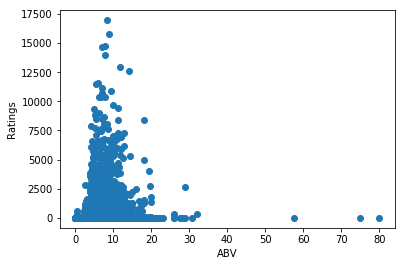

In [8]:
plt.scatter(x=train_data_5['ABV'], y=train_data_5['Ratings'])
plt.xlabel('ABV')
plt.ylabel('Ratings')
plt.show()
# Note: many values are in zero

### Regression to predict the ratings

In [119]:
data_reg=train_data_5[['ABV', 'max_servingtemperature', 'Ratings']]

In [120]:
data_reg['log_rating']=[np.log(1+data_reg['Ratings'][i]) for i in range(len(data_reg))]

C:\Users\Vinoth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [121]:
data_reg.head()

,ABV,max_servingtemperature,Ratings,log_rating
0,6.500000,50,22,3.135494
1,5.500000,45,1,0.693147
2,8.100000,45,3,1.386294
3,6.354961,40,0,0.000000
4,6.000000,45,1,0.693147


In [175]:
data_reg.groupby(['ABV']).agg({'ABV':'count'}).sort_values(by='ABV', ascending=False).head(20)

C:\Users\Vinoth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'ABV' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


,ABV
ABV,
6.354961,15130
5.000000,12908
6.000000,9704
5.500000,8773
6.500000,7175
7.000000,7117
4.500000,6032
5.200000,5366
8.000000,5275


In [122]:
# Drop ABV greater than 30 it doesn't make much sense
data_reg=data_reg.loc[data_reg['ABV']<=25]

In [123]:
trian_reg_data=data_reg.loc[data_reg['Ratings']!=0]
test_reg_data=data_reg.loc[data_reg['Ratings']==0]

In [124]:
trian_reg_data=trian_reg_data.reset_index().drop(labels='index', axis=1)
test_reg_data=test_reg_data.reset_index().drop(labels='index', axis=1)

In [125]:
trian_reg_data.shape, test_reg_data.shape

((159542, 4), (26089, 4))

In [127]:
trian_reg_data.head()

,ABV,max_servingtemperature,Ratings,log_rating
0,6.5,50,22,3.135494
1,5.5,45,1,0.693147
2,8.1,45,3,1.386294
3,6.0,45,1,0.693147
4,7.4,50,1,0.693147


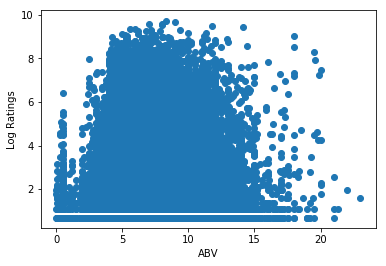

In [128]:
plt.scatter(x=trian_reg_data['ABV'], y=trian_reg_data['log_rating'])
plt.xlabel('ABV')
plt.ylabel('Log Ratings')
plt.show()

In [129]:
trian_reg_data.corr()

,ABV,max_servingtemperature,Ratings,log_rating
ABV,1.000000,0.501952,0.054523,0.093367
max_servingtemperature,0.501952,1.000000,0.029193,0.044231
Ratings,0.054523,0.029193,1.000000,0.465581
log_rating,0.093367,0.044231,0.465581,1.000000


In [130]:
mean_train=np.mean(trian_reg_data['log_rating'])
std_train=np.std(trian_reg_data['log_rating'])

In [159]:
min_val=min(trian_reg_data['log_rating'])
max_val=max(trian_reg_data['log_rating'])

In [161]:
min_max_norm=[(trian_reg_data['log_rating'][i]-min_val)/(max_val-min_val) for i in range(len(trian_reg_data['log_rating']))]

In [144]:
exp_val=[math.e**((trian_reg_data['log_rating'][i]-mean_train)/std_train) for i in range(len(trian_reg_data))]

In [157]:
trian_reg_data['exp_val_sq_ratings']=[a*b for a,b in zip(exp_val,exp_val)]

In [162]:
trian_reg_data['min_max_norm']=min_max_norm

In [163]:
trian_reg_data.corr()

,ABV,max_servingtemperature,Ratings,log_rating,exp_val_ratings,exp_val_sq_ratings,min_max_norm
ABV,1.000000,0.501952,0.054523,0.093367,0.069422,0.036500,0.093367
max_servingtemperature,0.501952,1.000000,0.029193,0.044231,0.035188,0.021994,0.044231
Ratings,0.054523,0.029193,1.000000,0.465581,0.964044,0.936539,0.465581
log_rating,0.093367,0.044231,0.465581,1.000000,0.635509,0.278178,1.000000
exp_val_ratings,0.069422,0.035188,0.964044,0.635509,1.000000,0.820201,0.635509
exp_val_sq_ratings,0.036500,0.021994,0.936539,0.278178,0.820201,1.000000,0.278178
min_max_norm,0.093367,0.044231,0.465581,1.000000,0.635509,0.278178,1.000000


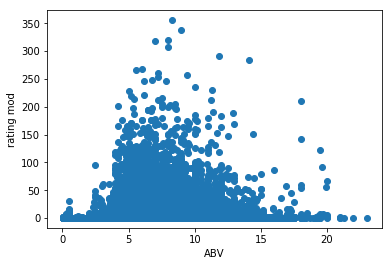

In [146]:
plt.scatter(x=trian_reg_data['ABV'], y=exp_val)
plt.xlabel('ABV')
plt.ylabel('rating mod')
plt.show()

In [44]:
# Regression model packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

# Model Packages
from sklearn.linear_model import LinearRegression

y=trian_reg_data['Ratings']
X=trian_reg_data.drop(labels='Ratings', axis=1)

X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=30)

In [45]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((111687, 3), (47866, 3), (111687,), (47866,))

In [46]:
X_train.head()

,ABV,max_servingtemperature,ABV_square
49282,4.800000,50,121.510418
163476,7.000000,50,1096.633158
130579,9.800000,55,18033.744928
38927,4.300000,45,73.699794
152437,6.354961,50,575.339750


In [47]:
regressor=LinearRegression()
model_obj=regressor.fit(X_train,y_train)
y_act=y_test
y_pred=model_obj.predict(X_test)

In [48]:
mean_abs_err=mean_absolute_error(y_act, y_pred)
root_mean_sqr_err=sqrt(mean_squared_error(y_act, y_pred))
root_mean_sqr_err

287.71347177487775

### Identify the strength of beer

In [176]:
train_data_6=pd.read_csv('train_prepocessed_beer_dataset.csv')
test_data_6=pd.read_csv('test_prepocessed_beer_dataset.csv')

In [257]:
train_data_6.shape, test_data_6.shape

((185643, 31), (20628, 31))

In [177]:
train_data_6.head()

,Unnamed: 0,ABV,Brewing Company,Food Paring,Glassware Used,Beer Name,Ratings,Style Name,Cellar Temperature,Serving Temperature,...,pilsenerglass,snifter,oversizedwineglass,tulip,stange,weizenglass,goblet,mug,pintglass,beer_category_group
0,0,6.500000,8929,"(Curried,Thai)Cheese(pepperyMontereyPepperJack...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",15121,22,AmericanIPA,40-45,45-50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Ales
1,1,5.500000,13187,"(PanAsian)Cheese(earthyCamembert,Fontina,nutty...","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",59817,1,AmericanPaleAle(APA),35-40,40-45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Ales
2,2,8.100000,6834,"Meat(Pork,Poultry)","PintGlass(orBecker,Nonic,Tumbler),Mug(orSeidel...",32669,3,IrishRedAle,35-40,40-45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Ales
3,3,6.354961,11688,"(Indian,LatinAmerican,PanAsian)General(Aperitif)","PintGlass(orBecker,Nonic,Tumbler),PilsenerGlas...",130798,0,AmericanMaltLiquor,35-40,35-40,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Malts
4,4,6.000000,10417,"Meat(Poultry,Fish,Shellfish)",PilsenerGlass(orPokal),124087,1,EuroPaleLager,35-40,40-45,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lagers


In [249]:
beer_brew_styles=['Amber','Blonde','Brown','Cream','Dark','Fruit','Golden','Honey','Light','Lime','Pale','Pilsner',\
            'Red','Strong','Wheat','Malt','APA','IPA']

In [280]:
def brew_style(df):
    beer_brew_style_1=[]
    for beer in range(len(df)):
        style_beer=re.findall('[A-Z][^A-Z-()]*', df['Style Name'][beer])
        cnt=[]
        if style_beer[-1]=='A':
            style_beer=(style_beer[0]+str(' ')+"".join(style_beer[-3:])).split()
        for style in style_beer:
            if style in beer_brew_styles:
                cnt.append(style)
        style_x=" ".join(cnt)
        beer_brew_style_1.append(style_x)
    return beer_brew_style

In [281]:
train_data_7=brew_style(df=train_data_6)
test_data_7=brew_style(df=test_data_6)

In [283]:
len(train_data_7)

439586

### END